In [1]:
import pandas as pd
GO_df = pd.read_csv("GO_enrichment_result_with_description_with_depth_with_ancester.csv")

In [2]:
GO_df.head()

,cluster_id,number_of_genes,enriched_GO,p_value,overlapped_number_of_genes,total_genes_in_the_term,adjusted_p_value,term_description,GO_depth,ancester
0,2,347,GO:0031072,0.009571,3,27,0.037527,heat shock protein binding,4,"[u'GO:0031072', u'GO:0005515', u'GO:0005488', ..."
1,2,347,GO:0006629,0.286773,4,165,0.483987,lipid metabolic process,5,"[u'GO:0008150', u'GO:0008152', u'GO:0006629', ..."
2,2,347,GO:0006979,0.920771,2,252,1.000000,response to oxidative stress,4,"[u'GO:0006979', u'GO:0008150', u'GO:0050896', ..."
3,2,347,GO:0016987,0.000084,3,6,0.001061,bacterial sigma factor activity,29,"[u'GO:0019219', u'GO:0016987', u'GO:2000142', ..."
4,2,347,GO:0020037,0.979334,6,719,1.000000,heme binding,7,"[u'GO:0046906', u'GO:0097159', u'GO:1901363', ..."


In [3]:
# remove this GO term if it appears in the ancester list of another GO term
from copy import deepcopy as dp
temp_list = GO_df.ancester.tolist()
selected_row = []
count = 0
for i in GO_df.index:
    current_GO = GO_df.at[i,'enriched_GO']
    # check if it appears in the ancester list of other GO terms
    flag = False
    for my_ancester_list in temp_list[:count] + temp_list[count+1 :]:
        if current_GO in my_ancester_list:
            flag = True
            break
    if not flag:
        selected_row.append(i)
    count += 1

In [4]:
len(selected_row)

169

In [6]:
GO_df_selected = GO_df.loc[selected_row]

In [7]:
import numpy as np

my_enriched_go = GO_df_selected[GO_df_selected.adjusted_p_value <= 0.05].term_description.tolist()
my_enriched_go = list(set(my_enriched_go))
print len(my_enriched_go)
my_enriched_id = GO_df_selected[GO_df_selected.adjusted_p_value <= 0.05].cluster_id.tolist()
my_enriched_id = list(set(my_enriched_id))
print len(my_enriched_id)
my_GO_heatmap_df = pd.DataFrame(np.zeros((len(my_enriched_go),len(my_enriched_id))))
my_GO_heatmap_df.index = my_enriched_go
my_GO_heatmap_df.columns = my_enriched_id
from math import log
# -log(8.02392282388E-37,10)
for row in GO_df_selected.index:
    j = GO_df_selected.at[row,'cluster_id']
    i = GO_df_selected.at[row,'term_description']
    my_value = GO_df_selected.at[row,'overlapped_number_of_genes']
    if i not in my_enriched_go:
        continue
    if j not in my_enriched_id:
        continue
    
    my_GO_heatmap_df.set_value(i,j,my_value)
#     my_GO_heatmap_df.set_value(i,j,my_value)




87
11


In [11]:
my_GO_heatmap_df

,1,2,3,4,5,7,8,10,11,12,21
regulation of anion transport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
carotenoid biosynthetic process,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
protein transporter activity,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eukaryotic translation initiation factor 3 complex,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
small-subunit processome,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
transcription coactivator activity,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
histone acetyltransferase activity,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATP-dependent chromatin remodeling,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"mitochondrial electron transport, ubiquinol to cytochrome c",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
myosin complex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage,leaves_list
linkage_matrix = linkage(my_GO_heatmap_df.values.T,method="ward")
col_reorder = leaves_list(linkage_matrix)
print col_reorder

[ 0  3  7  1  2  4  9  6  8  5 10]


In [9]:
col_reorder_names = my_GO_heatmap_df.columns[col_reorder].tolist()
import seaborn as sns
current_palette = sns.color_palette("hls", 21)
a = dict(zip(range(1,22), current_palette))
print a
col_color = map(lambda x:a[int(x)],col_reorder_names)
my_col_color = pd.DataFrame()
my_col_color['name'] = col_reorder_names
my_col_color['color'] = col_color
my_col_color.set_index('name',inplace=True)
my_col_color

{1: (0.86, 0.37119999999999997, 0.33999999999999997), 2: (0.86, 0.51977142857142855, 0.33999999999999997), 3: (0.86, 0.66834285714285713, 0.33999999999999997), 4: (0.86, 0.8169142857142857, 0.33999999999999997), 5: (0.7545142857142858, 0.86, 0.33999999999999997), 6: (0.60594285714285712, 0.86, 0.33999999999999997), 7: (0.45737142857142832, 0.86, 0.33999999999999997), 8: (0.33999999999999997, 0.86, 0.37119999999999997), 9: (0.33999999999999997, 0.86, 0.51977142857142855), 10: (0.33999999999999997, 0.86, 0.66834285714285713), 11: (0.33999999999999997, 0.86, 0.8169142857142857), 12: (0.33999999999999997, 0.7545142857142858, 0.86), 13: (0.33999999999999997, 0.60594285714285712, 0.86), 14: (0.33999999999999997, 0.45737142857142832, 0.86), 15: (0.37119999999999997, 0.33999999999999997, 0.86), 16: (0.51977142857142811, 0.33999999999999997, 0.86), 17: (0.66834285714285679, 0.33999999999999997, 0.86), 18: (0.81691428571428548, 0.33999999999999997, 0.86), 19: (0.86, 0.33999999999999997, 0.754514

,color
name,
1,"(0.86, 0.3712, 0.34)"
4,"(0.86, 0.816914285714, 0.34)"
10,"(0.34, 0.86, 0.668342857143)"
2,"(0.86, 0.519771428571, 0.34)"
3,"(0.86, 0.668342857143, 0.34)"
5,"(0.754514285714, 0.86, 0.34)"
12,"(0.34, 0.754514285714, 0.86)"
8,"(0.34, 0.86, 0.3712)"
11,"(0.34, 0.86, 0.816914285714)"


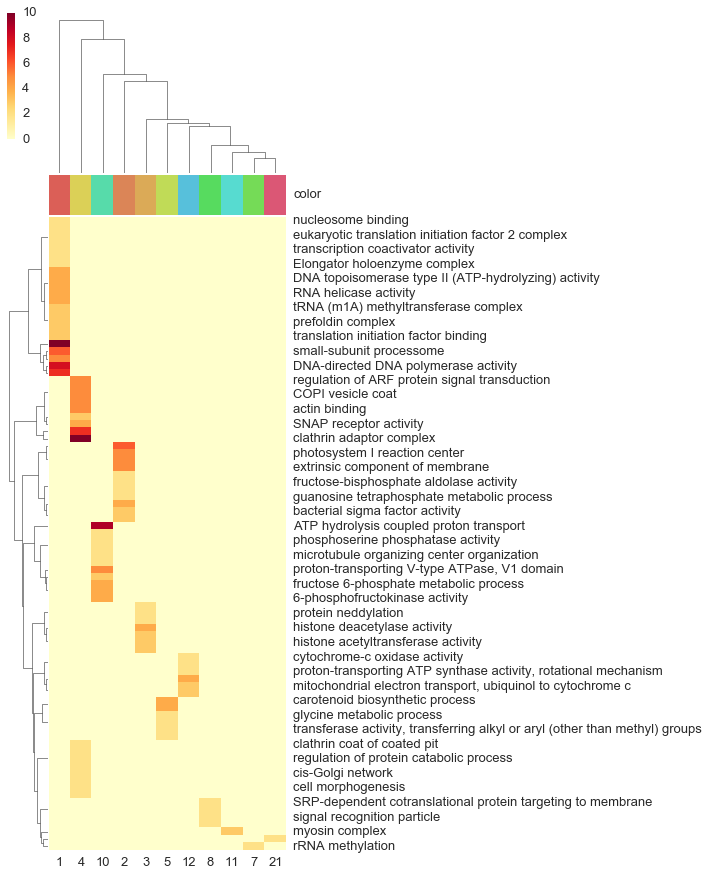

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
%matplotlib inline
sns.set(color_codes=True)
sns.set(font_scale=1.3)
# fig = pylab.figure(figsize=(10,20))
# colors = sns.color_palette("YlOrRd", n_colors=5)
# print [colors[0]] * 5
# myColors = [(1,1,1)]+[colors[0]] * 5 + [colors[1]] * 5+ [colors[2]]* 5+ [colors[3]] * 5+ [colors[4]] * 11
# myColors = [(1,1,1)]+[colors[0]] * 5 + [colors[1]] * 5+ [colors[2]]* 23
# myColors = [(1,1,1)]+colors[:-1] + [colors[-1]] * 9
# cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
# cmap = ListedColormap( myColors,'Custom', len(myColors))

# plot=sns.clustermap(my_GO_heatmap_df,cmap=cmap,method="ward",figsize=(5,30),col_colors = my_col_color,robust=False)
# plot=sns.clustermap(my_GO_heatmap_df,cmap=cmap,method="ward",figsize=(5,15),col_colors = my_col_color,robust=False)
plot=sns.clustermap(my_GO_heatmap_df,cmap='YlOrRd',method="ward",figsize=(5,15),col_colors = my_col_color,robust=False)

# plt.setp(plot.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# colorbar  = plot.ax_heatmap.collections[0].colorbar
# colorbar.set_ticks([0, 1, 2,3,4,5,34])
# colorbar.set_ticklabels(['0-1', '1-2', '2-3', '3-4', '4-5', '5-34'])
# colorbar.set_label(['xxxxxxx', '1-2', '2-3', '3-4', '4-5', '5-34'])